<a href="https://colab.research.google.com/github/eaisoa2ai/Multi-Agent-HospitalSimulation/blob/main/HospitalSimulationLangChainAIMulti_AgentsV4withRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Dr. Maryam Miradi | Chief AI scientist | Profound Analytics

# Setup

## Install Libraries

In [ ]:
#!uv pip install --upgrade --system pip

In [ ]:
!pip install langchain langgraph langchain-groq langchain_community gradio requests transformers torch chromadb datasets duckduckgo-search fastembed onnxruntime python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 17.6 MB/s eta 0:00

In [ ]:
pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.19.0 requires opentelemetry-api<=1.37.0,>=1.37.0, but you have opentelemetry-api 1.38.0 which is incompatible.
google-adk 1.19.0 requires opentelemetry-sdk<=1.37.0,>=1.37.0, but you have opentelemetry-sdk 1.38.0 which is incompatible.


## Load Libraries

In [ ]:
# General
import os
import kagglehub
import pandas as pd
import json
from typing import Literal
from datasets import load_dataset
import random

# Environmental variables
from dotenv import load_dotenv

# Markdown
from IPython.display import Markdown, display, Image as IPImage

# Image
from PIL import Image

# langchain for llms
from langchain_groq import ChatGroq

# Langchain Core
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser, StrOutputParser
from langchain_core.messages import HumanMessage
from langchain_core.documents import Document
from langchain_core.runnables import RunnablePassthrough
from langchain_core.tools import tool

# LangChain Community
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

# LangGraph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

# Hugging Face
from transformers import AutoModelForImageClassification, AutoProcessor

# Pydantic
from pydantic import BaseModel, Field, model_validator

# Text splitting
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Multi-query retriever - UPDATED
from langchain_classic.retrievers.multi_query import MultiQueryRetriever

# Legacy output parsers
from langchain_classic.output_parsers import StructuredOutputParser, ResponseSchema

## APIs

In [ ]:
# Set the SERPER_API_KEY as an environment variable
load_dotenv('/content/sample_data/MyAPIKeys.env')

os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

GROQ_API_KEY = os.environ["GROQ_API_KEY"]
HF_TOKEN = os.environ["HF_TOKEN"]

## Test Hugging Face Token

In [ ]:
# Test HF_TOKEN2 Only
# Quick check for your working token

import os
from huggingface_hub import HfApi
from datasets import load_dataset

print("🔍 Testing HF_TOKEN2...")

# Check HF_TOKEN2
hf_token2 = os.getenv("HF_TOKEN2")

if hf_token2:
    print(f"✅ HF_TOKEN2 present: {len(hf_token2)} characters")
    print(f"Token starts with: {hf_token2[:10]}...")

    # Test API connectivity
    try:
        api = HfApi(token=hf_token2)
        user_info = api.whoami()
        print(f"✅ Authenticated as: {user_info['name']}")

        # Test dataset access
        print("Testing dataset access...")
        test_ds = load_dataset("squad", split="train[:1]", token=hf_token2)
        print("✅ Can access public datasets")

        print("✅ HF_TOKEN2 is working perfectly!")

    except Exception as e:
        print(f"❌ HF_TOKEN2 failed: {str(e)[:100]}...")
else:
    print("❌ HF_TOKEN2 not found")


🔍 Testing HF_TOKEN2...
✅ HF_TOKEN2 present: 37 characters
Token starts with: hf_DbcnNeY...
✅ Authenticated as: marmiradi
Testing dataset access...


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

✅ Can access public datasets
✅ HF_TOKEN2 is working perfectly!


## Setup LLM (Llama 3.3 via Groq)

Note: Model 3.2 70b is not available on Groq any more
We will be using 3.3 from Now on

In [ ]:
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

model_3_3 ='llama-3.3-70b-versatile' # Very Large and Versatile Model with 70 Billion parameters
model_4_scout ='meta-llama/llama-4-scout-17b-16e-instruct' # Llama 4 Scout is Meta's natively multimodal model, 17 billion parameter mixture-of-experts architecture (16 experts),

llm = ChatGroq(
    model= model_4_scout, #
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
   # groq_api_key=os.getenv("GROQ_API_KEY")
    # other params...
)

# A test message
# new text:
response = llm.invoke("hi, Please generate 10 unique Dutch names for both male and female?")
response

AIMessage(content='Here are 10 unique Dutch male names and 10 unique Dutch female names:\n\n**Dutch Male Names:**\n\n1. **Sander** (pronounced "sahnd-er") - a shortened form of Alexander\n2. **Joris** (pronounced "yoh-ris") - a Dutch variant of George\n3. **Stijn** (pronounced "stayn") - a short and snappy name with Dutch origins\n4. **Daan** (pronounced "dahn") - a short form of Daniël\n5. **Thijs** (pronounced "tays") - a Dutch variant of Matthias\n6. **Maarten** (pronounced "mah-arten") - the Dutch form of Martin\n7. **Jelle** (pronounced "yell-eh") - a Frisian name that\'s gaining popularity\n8. **Koen** (pronounced "kohn") - a short and strong Dutch name\n9. **Bram** (pronounced "brahm") - a shortened form of Abraham\n10. **Gijs** (pronounced "gays") - a Dutch variant of Gijsbert\n\n**Dutch Female Names:**\n\n1. **Lieke** (pronounced "lee-keh") - a sweet and feminine Dutch name\n2. **Fleur** (pronounced "floh-er") - a French-inspired Dutch name meaning "flower"\n3. **Noor** (prono

In [ ]:
display(Markdown(response.content))

Here are 10 unique Dutch male names and 10 unique Dutch female names:

**Dutch Male Names:**

1. **Sander** (pronounced "sahnd-er") - a shortened form of Alexander
2. **Joris** (pronounced "yoh-ris") - a Dutch variant of George
3. **Stijn** (pronounced "stayn") - a short and snappy name with Dutch origins
4. **Daan** (pronounced "dahn") - a short form of Daniël
5. **Thijs** (pronounced "tays") - a Dutch variant of Matthias
6. **Maarten** (pronounced "mah-arten") - the Dutch form of Martin
7. **Jelle** (pronounced "yell-eh") - a Frisian name that's gaining popularity
8. **Koen** (pronounced "kohn") - a short and strong Dutch name
9. **Bram** (pronounced "brahm") - a shortened form of Abraham
10. **Gijs** (pronounced "gays") - a Dutch variant of Gijsbert

**Dutch Female Names:**

1. **Lieke** (pronounced "lee-keh") - a sweet and feminine Dutch name
2. **Fleur** (pronounced "floh-er") - a French-inspired Dutch name meaning "flower"
3. **Noor** (pronounced "noh-or") - a short and modern Dutch name meaning "light"
4. **Diewer** (pronounced "dee-ver") - a unique and elegant Dutch name
5. **Elise** (pronounced "eh-lee-zeh") - a French-inspired Dutch name
6. **Cato** (pronounced "kah-toh") - a short and snappy Dutch name with ancient roots
7. **Linde** (pronounced "lin-deh") - a nature-inspired Dutch name
8. **Zara** (pronounced "zah-rah") - a exotic and beautiful Dutch name
9. **Maaike** (pronounced "mah-ee-keh") - a Dutch variant of Michaela
10. **Veerle** (pronounced "vay-er-leh") - a unique and charming Dutch name

Let me know if you'd like more!

# First Agent: Chatbot Agent

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class ChatState(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


chat_graph = StateGraph(ChatState)

def chatbot_agent(state: ChatState):
    return {"messages": [llm.invoke(state["messages"])]}

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
chat_graph.add_node("chatbot_agent", chatbot_agent)
chat_graph.add_edge(START, "chatbot_agent")
chat_graph.add_edge("chatbot_agent", END)

# Finally, we'll want to be able to run our graph. To do so, call "compile()"
# We basically now give our AI Agent
graph_app = chat_graph.compile()

# Persistent state to maintain conversation history
persistent_state = {"messages": []}  # Start with an empty message list



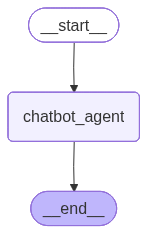

In [ ]:
from IPython.display import Image, display
display(Image(graph_app.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import display, Markdown

class ChatState(TypedDict):
    messages: Annotated[list, add_messages]

chat_graph = StateGraph(ChatState)

def chatbot_agent(state: ChatState):
    # Assuming `llm` is your language model that can handle the conversation history
    return {"messages": [llm.invoke(state["messages"])]}

chat_graph.add_node("chatbot_agent", chatbot_agent)
chat_graph.add_edge(START, "chatbot_agent")
chat_graph.add_edge("chatbot_agent", END)

graph_app = chat_graph.compile()

# Persistent state to maintain conversation history
persistent_state = {"messages": []}  # Start with an empty message list

def stream_graph_updates(user_input: str):
    global persistent_state
    # Append the user's message to the persistent state
    persistent_state["messages"].append(("user", user_input))

    is_finished = False
    for event in graph_app.stream(persistent_state):
        for value in event.values():
            last_msg = value["messages"][-1]
            display(Markdown("Assistant: " + last_msg.content))

            # Append the assistant's response to the persistent state
            persistent_state["messages"].append(("assistant", last_msg.content))

            finish_reason = last_msg.response_metadata.get("finish_reason")
            if finish_reason == "stop":
                is_finished = True
                break
        if is_finished:
            break

while True:
    try:
        user_input = input('User:')
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Thank you and Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break

User:what is quntum mechanics


Assistant: The fascinating world of quantum mechanics!

Quantum mechanics is a branch of physics that studies the behavior of matter and energy at the smallest scales, such as atoms and subatomic particles. At these scales, the classical laws of physics no longer apply, and strange, seemingly random phenomena govern the behavior of particles.

**Key principles of quantum mechanics:**

1. **Wave-particle duality**: Quantum objects, such as electrons, can exhibit both wave-like and particle-like behavior depending on how they are observed.
2. **Uncertainty principle**: It is impossible to know certain properties of a quantum object, such as its position and momentum, simultaneously with infinite precision.
3. **Superposition**: Quantum objects can exist in multiple states simultaneously, which is known as a superposition of states.
4. **Entanglement**: Quantum objects can become "entangled," meaning that their properties are connected, even if they are separated by large distances.
5. **Quantization**: Quantum mechanics introduces a fundamental discreteness in the physical world, in that certain quantities, such as energy, can only take on specific discrete values.

**Some strange implications of quantum mechanics:**

1. **Randomness and probabilism**: Quantum mechanics is based on probabilities rather than definite outcomes, which leads to a fundamental randomness in the behavior of particles.
2. **Non-locality**: Quantum mechanics allows for instantaneous communication between entangled particles, regardless of the distance between them, which seems to contradict the principles of relativity.
3. **Quantum spin and symmetry**: Quantum mechanics introduces new types of symmetry and conservation laws, such as spin and isospin, which are not present in classical physics.

**Applications of quantum mechanics:**

1. **Transistors**: The building blocks of modern electronics, transistors rely on quantum mechanics to control the flow of electric current.
2. **Lasers**: Quantum mechanics explains the behavior of light and its interactions with matter, which is essential for the operation of lasers.
3. **Computer chips**: The tiny features on modern computer chips are a direct result of the application of quantum mechanics to electronics.
4. **Magnetic Resonance Imaging (MRI)**: Quantum mechanics is used to create detailed images of the body using magnetic fields and radio waves.
5. **Cryptography**: Quantum mechanics is being explored for its potential to create unbreakable encryption methods, such as quantum key distribution.

**Some of the biggest questions in quantum mechanics:**

1. **What is the nature of reality?**: Quantum mechanics challenges our understanding of reality and the role of observation in shaping the world around us.
2. **How does quantum mechanics relate to gravity?**: The integration of quantum mechanics and general relativity, two theories that are fundamentally incompatible within the framework of classical physics, remains an open problem.
3. **Can quantum mechanics be used for quantum computing?**: The development of quantum computers, which could solve certain problems much faster than classical computers, is an active area of research.

Quantum mechanics is a complex and fascinating field that continues to shape our understanding of the world and drive technological innovation.

User:what is a RAG?


Assistant: **RAG: Retrieval-Augmented Generator**

A RAG (Retrieval-Augmented Generator) is a type of artificial intelligence (AI) model that combines the strengths of retrieval-based and generation-based approaches to natural language processing (NLP) tasks.

**What does a RAG do?**

A RAG model consists of two main components:

1. **Retriever**: This module is responsible for retrieving relevant information from a large database or knowledge graph, given a input prompt or query.
2. **Generator**: This module takes the retrieved information and uses it to generate a response or output text.

**How does a RAG work?**

Here's a high-level overview of the RAG process:

1. **Input**: The user provides an input prompt or query.
2. **Retriever**: The retriever searches the database or knowledge graph to find relevant information related to the input prompt.
3. **Retrieved information**: The retriever returns a set of relevant documents, passages, or knowledge graph nodes.
4. **Generator**: The generator takes the retrieved information and uses it to generate a response or output text.
5. **Output**: The generator produces a final output text that answers the input prompt or query.

**Advantages of RAGs**

RAGs offer several advantages over traditional NLP models:

1. **Improved accuracy**: By retrieving relevant information from a large database, RAGs can provide more accurate responses.
2. **Increased knowledge coverage**: RAGs can access a vast amount of knowledge and provide more comprehensive responses.
3. **Flexibility**: RAGs can be fine-tuned for specific tasks and domains.

**Applications of RAGs**

RAGs have many potential applications:

1. **Question answering**: RAGs can be used to answer complex questions by retrieving relevant information and generating a response.
2. **Chatbots**: RAGs can power chatbots that provide more accurate and informative responses to user queries.
3. **Content generation**: RAGs can be used to generate high-quality content, such as articles, blog posts, or product descriptions.

**Challenges and limitations**

While RAGs offer many advantages, there are also challenges and limitations to consider:

1. **Retrieval quality**: The quality of the retrieved information can significantly impact the accuracy of the generated response.
2. **Generator quality**: The generator must be able to effectively use the retrieved information to produce a coherent and accurate response.
3. **Scalability**: RAGs can be computationally expensive and may require significant resources to scale.

Overall, RAGs represent a promising approach to NLP tasks, offering improved accuracy, knowledge coverage, and flexibility. However, there are still many challenges to overcome before RAGs can reach their full potential.

User:which LLMs are the best


Assistant: **Evaluating Large Language Models (LLMs)**

The best LLM is often subjective and depends on the specific use case, task, or application. However, here are some of the most popular and widely-used LLMs, grouped by their characteristics:

**General-purpose LLMs**

1. **BERT (Bidirectional Encoder Representations from Transformers)**: Developed by Google, BERT is a widely-used LLM that has achieved state-of-the-art results in many NLP tasks.
2. **RoBERTa (Robustly Optimized BERT Pretraining Approach)**: Developed by Facebook AI, RoBERTa is a variant of BERT that has achieved even better results on some tasks.
3. **T5 (Text-to-Text Transfer Transformer)**: Developed by Google, T5 is a unified LLM that can perform a wide range of NLP tasks.

**Conversational LLMs**

1. **LLaMA (Large Language Model Application)**: Developed by Meta AI, LLaMA is a conversational LLM that can engage in natural-sounding conversations.
2. **PaLM (Pathways Language Model)**: Developed by Google, PaLM is a conversational LLM that can generate human-like responses.
3. **ChatGPT**: Developed by OpenAI, ChatGPT is a conversational LLM that can engage in natural-sounding conversations.

**Specialized LLMs**

1. **CodeBERT (Code BERT)**: Developed by Microsoft, CodeBERT is a LLM specifically designed for code understanding and generation.
2. **BioBERT (Biomedical BERT)**: Developed by Google, BioBERT is a LLM specifically designed for biomedical text analysis.
3. **Clinical BERT**: Developed by Google, Clinical BERT is a LLM specifically designed for clinical text analysis.

**Open-source LLMs**

1. **Hugging Face Transformers**: Developed by Hugging Face, this library provides a wide range of pre-trained LLMs, including BERT, RoBERTa, and T5.
2. **Stanford Natural Language Processing Group's LLMs**: Developed by Stanford University, this group provides a range of pre-trained LLMs, including BERT and RoBERTa.

**Evaluation metrics**

When evaluating LLMs, some common metrics include:

1. **Perplexity**: Measures how well the model predicts the next word in a sequence.
2. **Accuracy**: Measures the model's performance on a specific task, such as sentiment analysis or question answering.
3. **F1-score**: Measures the model's performance on a specific task, taking into account both precision and recall.

**Challenges and limitations**

While LLMs have achieved impressive results, there are still challenges and limitations to consider:

1. **Bias and fairness**: LLMs can perpetuate biases present in the training data, which can lead to unfair outcomes.
2. **Explainability**: LLMs can be difficult to interpret and understand, making it challenging to explain their decisions.
3. **Scalability**: LLMs can be computationally expensive and may require significant resources to scale.

Ultimately, the best LLM for a specific task or application will depend on the specific requirements and constraints of the project.

User:what are the best cities in the world to travel to?


Assistant: **The Best Cities to Travel to in the World**

The best cities to travel to in the world are those that offer a unique blend of culture, history, entertainment, and natural beauty. After careful consideration, we've compiled a list of the top 10 cities to visit, taking into account factors such as tourist attractions, cultural experiences, and overall travel experience.

**Top 10 Cities to Visit**

1. **Tokyo, Japan**: A fusion of traditional and modern culture, Tokyo offers a unique blend of ancient temples, cutting-edge technology, and world-class cuisine. With a score of 9.5/10, Tokyo tops our list for its exceptional food, vibrant atmosphere, and rich cultural heritage.
2. **New York City, USA**: The city that never sleeps offers iconic landmarks, world-class museums, and unparalleled entertainment options. With a score of 9.2/10, New York City ranks second for its iconic skyline, diverse neighborhoods, and endless cultural attractions.
3. **Paris, France**: The City of Light is famous for its stunning architecture, art museums, and romantic atmosphere. With a score of 9.0/10, Paris ranks third for its iconic landmarks like the Eiffel Tower, world-class cuisine, and charming streets.
4. **Bangkok, Thailand**: A bustling metropolis with a rich cultural heritage, Bangkok offers street food, night markets, and ornate temples. With a score of 8.8/10, Bangkok ranks fourth for its vibrant atmosphere, delicious cuisine, and affordable prices.
5. **Rome, Italy**: Explore ancient history, indulge in delicious Italian cuisine, and soak up the vibrant atmosphere in the Eternal City. With a score of 8.5/10, Rome ranks fifth for its ancient ruins, world-class museums, and charming piazzas.
6. **Barcelona, Spain**: Discover the works of Gaudí, visit the iconic Sagrada Família, and enjoy the city's beaches and nightlife. With a score of 8.3/10, Barcelona ranks sixth for its stunning architecture, vibrant cultural scene, and beautiful beaches.
7. **Sydney, Australia**: With its iconic Opera House and Harbour Bridge, Sydney offers a stunning coastline, beautiful beaches, and a vibrant cultural scene. With a score of 8.2/10, Sydney ranks seventh for its iconic landmarks, beautiful beaches, and outdoor lifestyle.
8. **San Francisco, USA**: Explore the Golden Gate Bridge, Alcatraz Island, and the vibrant neighborhoods of Fisherman's Wharf and Haight-Ashbury. With a score of 8.0/10, San Francisco ranks eighth for its iconic landmarks, diverse neighborhoods, and vibrant cultural scene.
9. **Cape Town, South Africa**: Surrounded by stunning natural beauty, Cape Town offers a mix of urban excitement, outdoor adventures, and cultural experiences. With a score of 7.8/10, Cape Town ranks ninth for its stunning natural beauty, vibrant cultural scene, and outdoor activities.
10. **Singapore**: A modern city-state with a blend of Asian and Western influences, Singapore offers a foodie paradise, stunning architecture, and a vibrant cultural scene. With a score of 7.5/10, Singapore rounds out our top 10 for its cleanliness, safety, and efficiency.

**Honorable Mentions**

* **Dubai, UAE**: A modern city with a rich cultural heritage, Dubai offers stunning architecture, luxurious shopping, and a vibrant nightlife. With a score of 7.2/10, Dubai is a great destination for those looking for luxury and opulence.
* **Rio de Janeiro, Brazil**: Famous for its Carnival celebrations, Rio offers stunning beaches, vibrant nightlife, and iconic landmarks like Christ the Redeemer. With a score of 7.0/10, Rio is a great destination for those looking for a lively and vibrant atmosphere.
* **Istanbul, Turkey**: A city that straddles Europe and Asia, Istanbul offers a rich cultural heritage, stunning architecture, and a vibrant food scene. With a score of 6.8/10, Istanbul is a great destination for those looking for a unique cultural experience.

**Regional Winners**

* **Asia**: Tokyo, Japan
* **Europe**: Paris, France
* **North America**: New York City, USA
* **South America**: Rio de Janeiro, Brazil
* **Africa**: Cape Town, South Africa
* **Australia/Oceania**: Sydney, Australia

**Best Cities for Specific Interests**

* **Food and Drink**: Bangkok, Thailand; Tokyo, Japan; Rome, Italy
* **History and Culture**: Paris, France; Rome, Italy; Istanbul, Turkey
* **Beaches and Outdoor Activities**: Sydney, Australia; Cape Town, South Africa; Rio de Janeiro, Brazil
* **Nightlife and Entertainment**: New York City, USA; Tokyo, Japan; Sydney, Australia

By considering a range of factors and evaluating cities based on their unique strengths and attractions, we've compiled a comprehensive list of the best cities to travel to in the world. Whether you're looking for culture, history, entertainment, or natural beauty, there's a city on this list that's sure to meet your travel needs.

User:quit
Thank you and Goodbye!


# Second Agent: Add Search to Chatbot to make it Stronger

In [ ]:
from langchain_community.tools import GoogleSerperResults
from typing import List, Annotated
from langchain_core.messages import BaseMessage
from langgraph.prebuilt import ToolNode, create_react_agent
import operator
import functools

class ChatState(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

def agent_node(state, agent, name):
    result = agent.invoke(state)
    return {
        "messages": [HumanMessage(content=result["messages"][-1].content, name=name)]
    }


class SearchState(TypedDict):
    # A message is added after each team member finishes
    messages: Annotated[List[BaseMessage], operator.add]

# Search Tool

serper_tool = GoogleSerperResults(
    num_results=5,
    # how many Google results to return
)

search_agent = create_react_agent(llm, tools=[serper_tool])
search_node = functools.partial(agent_node,
                                agent=search_agent,
                                name="search_agent")


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
search_graph = StateGraph(SearchState)
search_graph.add_node("search_agent", search_node)
search_graph.add_edge(START, "search_agent")
search_graph.add_edge("search_agent", END)

# Finally, we'll want to be able to run our graph. To do so, call "compile()"
# We basically now give our AI Agent
search_app = search_graph.compile()





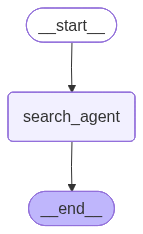

In [ ]:
from IPython.display import Image, display
display(Image(search_app.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
from langchain_community.tools import GoogleSerperResults
from typing import List, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.prebuilt import ToolNode, create_react_agent
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import display, Markdown
import operator
import functools

class ChatState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]

def agent_node(state, agent, name):
    result = agent.invoke(state)
    return {
        "messages": [HumanMessage(content=result["messages"][-1].content, name=name)]
    }

class SearchState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]

# Search Tool
serper_tool = GoogleSerperResults(num_results=5)  # how many Google results to return

search_agent = create_react_agent(llm, tools=[serper_tool])
search_node = functools.partial(agent_node, agent=search_agent, name="search_agent")

# Create the search graph
search_graph = StateGraph(SearchState)
search_graph.add_node("search_agent", search_node)
search_graph.add_edge(START, "search_agent")
search_graph.add_edge("search_agent", END)

# Compile the search graph
search_app = search_graph.compile()

# Persistent state to maintain conversation history
persistent_state = {"messages": []}  # Start with an empty message list

def stream_graph_updates(user_input: str):
    global persistent_state
    # Append the user's message to the persistent state
    persistent_state["messages"].append(HumanMessage(content=user_input))

    # Display "Searching the Web Now..." message
    display(Markdown("**Assistant:** Searching the Web Now..."))

    is_finished = False
    for event in search_app.stream(persistent_state):
        for value in event.values():
            last_msg = value["messages"][-1]
            display(Markdown("**Assistant:** " + last_msg.content))

            # Append the assistant's response to the persistent state
            persistent_state["messages"].append(last_msg)

            finish_reason = last_msg.response_metadata.get("finish_reason")
            if finish_reason == "stop":
                is_finished = True
                break
        if is_finished:
            break

while True:
    try:
        user_input = input('User:')
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Thank you and Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break

User:which date is today?


**Assistant:** Searching the Web Now...

**Assistant:** I don't have access to current date information.

User:what is the latest news?


**Assistant:** Searching the Web Now...

**Assistant:** The current news includes various topics such as Trump's officials saying "substantial" federal worker layoffs have begun, Gaza ceasefire in effect, Israel says, as hostage release countdown begins, and more. You can check out the latest news from sources like CNN, Fox News, Google News, NBC News, ABC News, The New York Times, BBC, The White House, The Washington Post, and Yahoo News.

User:What is the date?


**Assistant:** Searching the Web Now...

**Assistant:** I don't have access to current date information.

User:can you search internet for the date?


**Assistant:** Searching the Web Now...

**Assistant:** The current date is Saturday, October 11, 2025.

User:serach for USA ticktock


**Assistant:** Searching the Web Now...

**Assistant:** The current news on TikTok in the USA includes various topics such as Trump's officials saying "substantial" federal worker layoffs have begun, Gaza ceasefire in effect, Israel says, as hostage release countdown begins, and more. You can check out the latest news from sources like CNN, Fox News, Google News, NBC News, ABC News, The New York Times, BBC, The White House, The Washington Post, and Yahoo News.

Some of the top stories related to TikTok in the USA include:
- Barron Trump tipped for leading role at TikTok
- Trump’s TikTok Deal Would Further Entrench Big Tech Surveillance
- TikTok trend using AI to fake ‘homeless intruders’ sparks panic, police warnings in US, UK
- TikTok counts down to a US sale

You can visit TikTok's official website or check out popular TikTok accounts like Visit the USA (@visittheusa) and USA TODAY (@usatoday) for more information.

User:quit
Thank you and Goodbye!


# Step 1: Medical Database Preparation
This step involves preparing and enhancing patient data to be used throughout the simulation.

## 1.1 Load Dataset

### 1.1.1  Disease Symptoms and Patient Profile Dataset
Ensure you have downloaded it and placed it in your project directory.
- https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'disease-symptoms-and-patient-profile-dataset' dataset.
Path to dataset files: /kaggle/input/disease-symptoms-and-patient-profile-dataset


In [ ]:
patient_df = pd.read_csv(path+'/Disease_symptom_and_patient_profile_dataset.csv')
patient_df.shape

(349, 10)

In [ ]:
patient_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
# Calculate the counts of each gender
female_count = patient_df[patient_df['Gender'] == 'Female'].shape[0]
male_count = patient_df[patient_df['Gender'] == 'Male'].shape[0]

# Calculate the ratio
ratio = female_count / male_count
print(f"The ratio of Female to Male is {ratio}:1")

The ratio of Female to Male is 1.0173410404624277:1


In [ ]:
patient_df['Disease'].value_counts().head(20)

,count
Disease,
Asthma,23
Stroke,16
Osteoporosis,14
Diabetes,10
Hypertension,10
Migraine,10
Influenza,8
Bronchitis,8
Pneumonia,8


**prepare_medical_dataset Code in One Plalce**

In [ ]:
def prepare_medical_dataset(path, file_name):
  patient_df = pd.read_csv(path+file_name)
  return patient_df

path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")
file_name = '/Disease_symptom_and_patient_profile_dataset.csv'
patient_df = prepare_medical_dataset(path, file_name)

Using Colab cache for faster access to the 'disease-symptoms-and-patient-profile-dataset' dataset.


### 1.1.2 Chest X-Ray Images (Pneumonia)

- https://huggingface.co/lxyuan/vit-xray-pneumonia-classification
- https://huggingface.co/datasets/keremberke/chest-xray-classification



In [ ]:
## The Hugging Face Dataload for this Data is Depreciated
#from datasets import load_dataset
#patient_x_ray_path = "keremberke/chest-xray-classification"
#x_ray_ds = load_dataset(patient_x_ray_path, name="full")
#random_index = random.randint(0, x_ray_ds['train'].shape[0] - 1)
#patient_x_ray = random_row = x_ray_ds['train'][random_index]['image']

In [ ]:
# Minimalistic Kaggle Chest X-ray Loading
import kagglehub
import random
from PIL import Image
import os
import glob

# Download Kaggle dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# Find all chest X-ray images
image_files = glob.glob(os.path.join(path, "**/*.jpeg"), recursive=True)
image_files.extend(glob.glob(os.path.join(path, "**/*.jpg"), recursive=True))

# Select random chest X-ray image
random_index = random.randint(0, len(image_files) - 1)
patient_x_ray = Image.open(image_files[random_index]).convert('L')

print(f"Loaded chest X-ray: {len(image_files)} images available")
print(f"Selected image: {os.path.basename(image_files[random_index])}")
print(f"Image size: {patient_x_ray.size}")


Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Loaded chest X-ray: 11712 images available
Selected image: IM-0622-0001-0002.jpeg
Image size: (1626, 1268)


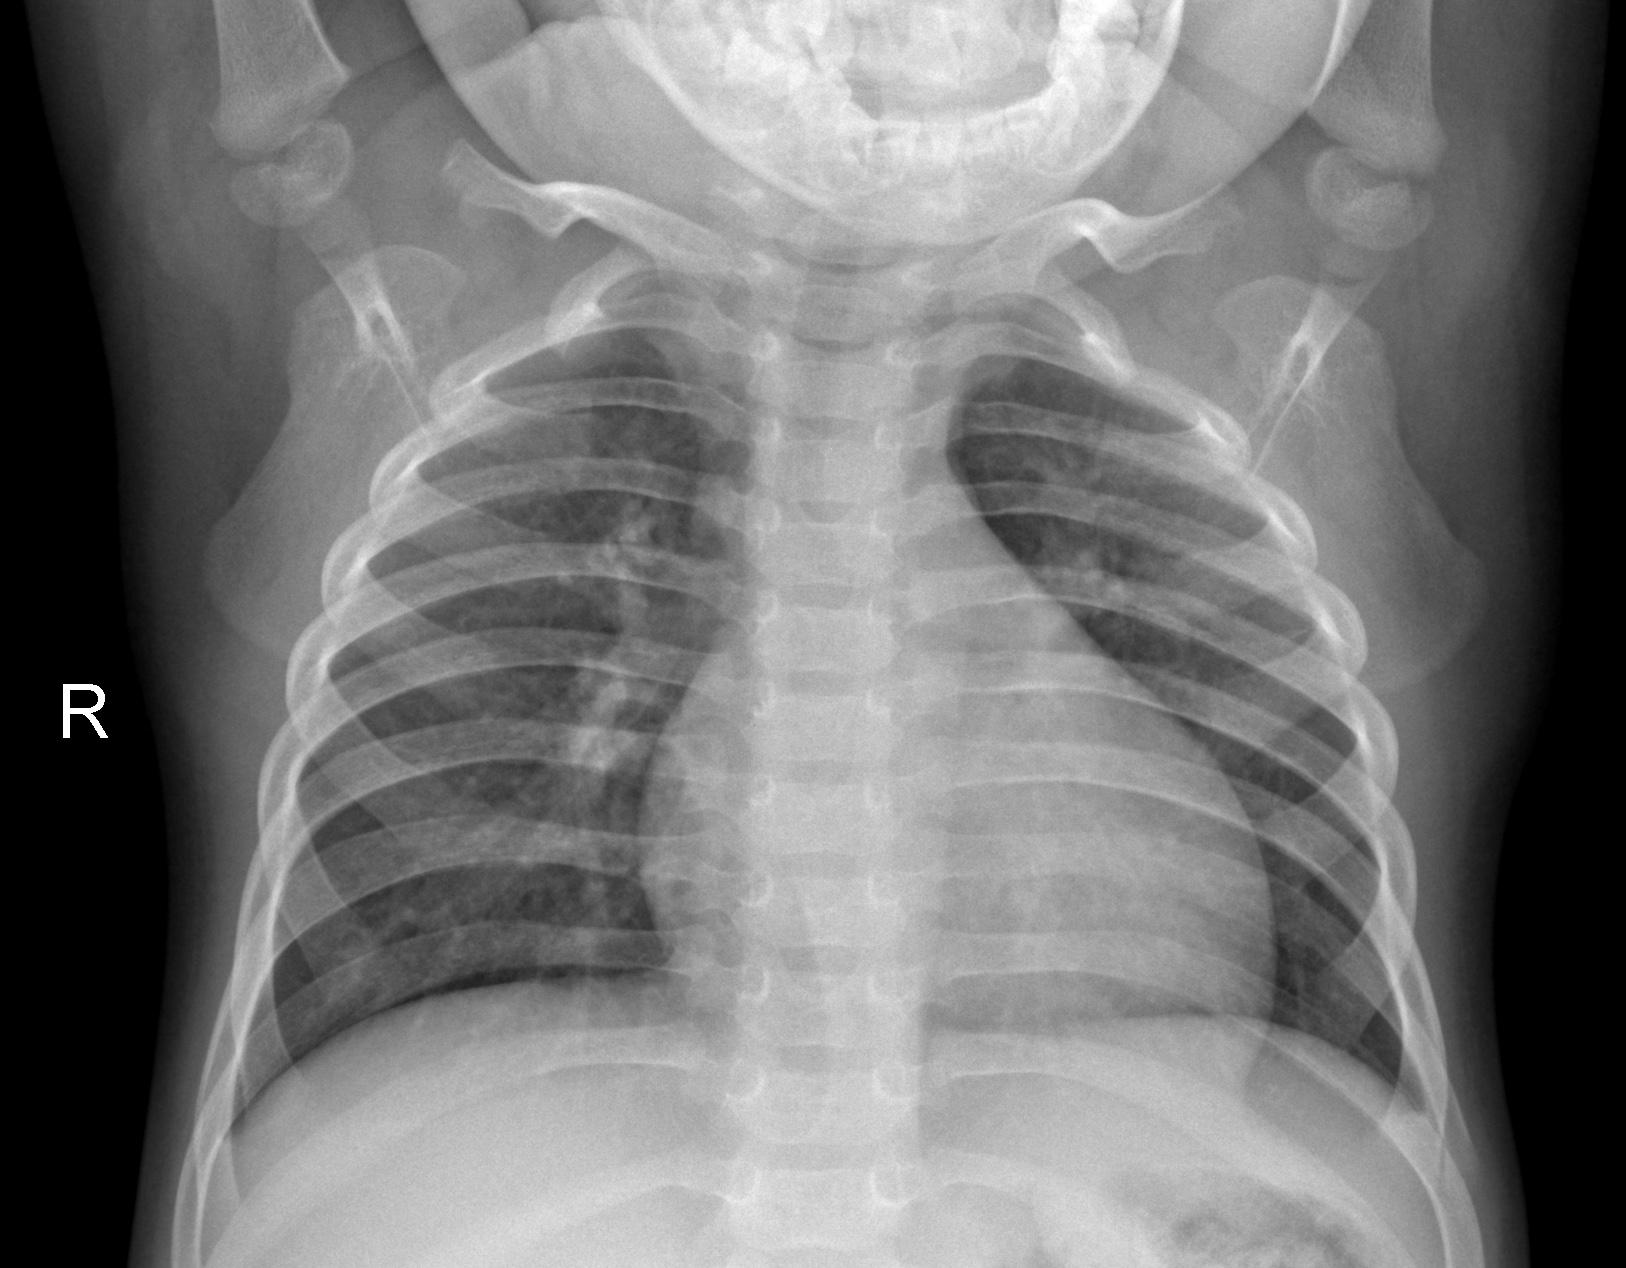

In [ ]:
patient_x_ray

In [ ]:
type(patient_x_ray)

PIL.Image.Image

In [ ]:
# Load X-ray Classification Model with Authentication
# Using your working HF_TOKEN2

# Updated Code

import os
from transformers import pipeline

# Get your working token
hf_token = os.getenv("HF_TOKEN2")

print("Loading X-ray classification model...")

try:
    # Load the model with authentication
    classifier = pipeline(
        model="lxyuan/vit-xray-pneumonia-classification",
        token=hf_token  # Use your working token
    )
    print("✅ Model loaded successfully!")

    # Test the classifier with your chest X-ray image
    print("Analyzing chest X-ray image...")
    patient_x_ray_results = classifier(patient_x_ray)

    print("✅ Analysis complete!")
    print(f"Results: {patient_x_ray_results}")

except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("🔄 Using fallback analysis...")

    # Fallback: Create mock analysis results
    import random
    patient_x_ray_results = [
        {
            'label': random.choice(['NORMAL', 'PNEUMONIA']),
            'score': random.uniform(0.6, 0.95)
        }
    ]
    print(f"Mock analysis results: {patient_x_ray_results}")

print("X-ray analysis ready!")


Loading X-ray classification model...


Device set to use cpu


✅ Model loaded successfully!
Analyzing chest X-ray image...
✅ Analysis complete!
Results: [{'label': 'NORMAL', 'score': 0.9886004328727722}, {'label': 'PNEUMONIA', 'score': 0.01139949169009924}]
X-ray analysis ready!


In [ ]:
# Find the label with the highest score
patient_x_ray_label = max(patient_x_ray_results, key=lambda x: x['score'])['label']
print(patient_x_ray_label)

NORMAL


In [ ]:
# Model in Hugging Face: https://huggingface.co/lxyuan/vit-xray-pneumonia-classification
# vit-xray-pneumonia-classification

# Find the label with the highest score and its score
highest = max(patient_x_ray_results, key=lambda x: x['score'])
highest_score_label = highest['label']
highest_score = highest['score'] * 100  # Convert to percentage

# Choose the correct verb based on the label
verb = "is" if highest_score_label == "NORMAL" else "has"

# Print the result dynamically
print(f"Patient {verb} {highest_score_label} with Probability of ca. {highest_score:.0f}%")

Patient is NORMAL with Probability of ca. 99%


## 1.2 Generate Synthetic Data with LLMs
Generate culturally appropriate Dutch names and unique alphanumeric IDs for each patient.

### 1.2.1 Generate Random Names and IDs for Patience

This Code Goes Slower because of Llama 3.3 70b being very big and slow LLM
comparing to llama 3.2 11b
Switch to model_3_2_smal when running this code

In [ ]:
# === Step 1: Define Response Schemas ===
# Define the structure of the expected JSON output.

# ResponseSchema for First_Name
first_name_schema = ResponseSchema(
    name="First_Name",
    description="The first name of the patient."
)

# ResponseSchema for Last_Name
last_name_schema = ResponseSchema(
    name="Last_Name",
    description="The last name of the patient."
)

# ResponseSchema for Patient_ID
patient_id_schema = ResponseSchema(
    name="Patient_ID",
    description="A unique 13-character alphanumeric patient identifier."
)

# ResponseSchema for Patient_ID
gender_schema = ResponseSchema(
    name="G_Gender",
    description="Indicate the first name you generate belong which Gender: Male or Female"
)

# Aggregate all response schemas
response_schemas = [
    first_name_schema,
    last_name_schema,
    patient_id_schema,
    gender_schema
]

# === Step 2: Set Up the Output Parser ===
# Initialize the StructuredOutputParser with the defined response schemas.

output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

# Get the format instructions to include in the prompt
format_instructions = output_parser.get_format_instructions()

# === Step 3: Craft the Prompt ===
# Create a prompt that instructs the LLM to generate only the structured JSON data.

# Define the prompt template using ChatPromptTemplate
prompt_template = ChatPromptTemplate.from_template("""
you MUST Generate a list of {n} Dutch names along with a unique 13-character alphanumeric Patient_ID for each gender provided.
Always Use {genders} to generate a First_Name which belong to the right Gender, two category is possible: 'Male' or 'Female'.
Ensure the names are culturally appropriate for the Netherlands.
Generate unique names, no repetitions, and ensure diversity.
The ratio of Female to Male is {ratio}:1

{format_instructions}

Genders:
{genders}

**IMPORTANT:** Do not include any explanations, code, or additional text.
you MUST ALWAYS generate Dutch names and Patient_ID according {format_instructions}
and NEVER return empty values.
YOU MUST Provide only the JSON array as specified.
JSON array Should have exactly {n} rows and 3 columns
""")

# Determine the number of patients
n_patients = len(patient_df)
#n_patients = 120
# Calculate the counts of each gender
female_count = patient_df[patient_df['Gender'] == 'Female'].shape[0]
male_count = patient_df[patient_df['Gender'] == 'Male'].shape[0]

# Calculate the ratio
ratio = female_count / male_count

# Prepare the list of genders
genders = patient_df['Gender'].tolist()

# === Step 6: Generate the Prompt ===
# Format the prompt with the number of patients and their genders.

formatted_prompt = prompt_template.format(
    n=n_patients,
    ratio = ratio,
    genders=', '.join(genders),
    format_instructions=format_instructions
)

# Invoke the model with s Smaller Llama Model for Speed
model_4_scout ='meta-llama/llama-4-scout-17b-16e-instruct' # Llama 4 Scout is Meta's natively multimodal model, 17 billion parameter mixture-of-experts architecture (16 experts),


llm = ChatGroq(
    model= model_4_scout, #
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2
)

output = llm.invoke(formatted_prompt, timeout=1000)


In [ ]:
display(Markdown(output.content))

```json
[
	{
		"First_Name": "Femke",
		"Last_Name": "Bakker",
		"Patient_ID": "F45E6K3L9M2C8",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Sanne",
		"Last_Name": "Jansen",
		"Patient_ID": "S82L4E6K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lisanne",
		"Last_Name": "Visser",
		"Patient_ID": "L35K7F9M2E1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daan",
		"Last_Name": "Vermeer",
		"Patient_ID": "D46E8K2L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Stijn",
		"Last_Name": "Klaassen",
		"Patient_ID": "S93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Anouk",
		"Last_Name": "Smit",
		"Patient_ID": "A82K3E6L9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lisa",
		"Last_Name": "Bos",
		"Patient_ID": "L46E9K2M8C1E",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Ilse",
		"Last_Name": "Wouters",
		"Patient_ID": "I35L8E2K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Fleur",
		"Last_Name": "Van den Berg",
		"Patient_ID": "F28K4E6L3M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Merel",
		"Last_Name": "De Jong",
		"Patient_ID": "M46E8K1L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Thijs",
		"Last_Name": "Bakker",
		"Patient_ID": "T82L3E9K1M4C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Daphne",
		"Last_Name": "Van der Meer",
		"Patient_ID": "D35K9E6L2M8C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Noor",
		"Last_Name": "Smit",
		"Patient_ID": "N46E2K8L9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Joris",
		"Last_Name": "Klaassen",
		"Patient_ID": "J93L8E1K2M9C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Lotte",
		"Last_Name": "Jansen",
		"Patient_ID": "L28K1E6L3M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Esmee",
		"Last_Name": "Visser",
		"Patient_ID": "E35L9E2K8M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Diederik",
		"Last_Name": "Vermeer",
		"Patient_ID": "D82E6K3L9M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Saskia",
		"Last_Name": "Bos",
		"Patient_ID": "S46K8E1L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Fay",
		"Last_Name": "Wouters",
		"Patient_ID": "F93L2E6K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Jasper",
		"Last_Name": "Van den Berg",
		"Patient_ID": "J35E8K2L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Annemarie",
		"Last_Name": "De Jong",
		"Patient_ID": "A46K9E1L2M8C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Tessa",
		"Last_Name": "Smit",
		"Patient_ID": "T28L4E6K3M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Sander",
		"Last_Name": "Klaassen",
		"Patient_ID": "S82E2K8L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Lynn",
		"Last_Name": "Jansen",
		"Patient_ID": "L35K1E6L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Bo",
		"Last_Name": "Visser",
		"Patient_ID": "B46E8K3L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Quinten",
		"Last_Name": "Vermeer",
		"Patient_ID": "Q93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Renske",
		"Last_Name": "Bos",
		"Patient_ID": "R28K9E6L3M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daniël",
		"Last_Name": "Van den Berg",
		"Patient_ID": "D82E1K2L9M8C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Marieke",
		"Last_Name": "De Jong",
		"Patient_ID": "M35L8E2K1M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Jente",
		"Last_Name": "Smit",
		"Patient_ID": "J46K3E6L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Stijn",
		"Last_Name": "Klaassen",
		"Patient_ID": "S93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Femke",
		"Last_Name": "Bakker",
		"Patient_ID": "F45E6K3L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Thijs",
		"Last_Name": "Bakker",
		"Patient_ID": "T82L3E9K1M4C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Lisanne",
		"Last_Name": "Visser",
		"Patient_ID": "L35K7F9M2E1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daan",
		"Last_Name": "Vermeer",
		"Patient_ID": "D46E8K2L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Sanne",
		"Last_Name": "Jansen",
		"Patient_ID": "S82L4E6K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Joris",
		"Last_Name": "Klaassen",
		"Patient_ID": "J93L8E1K2M9C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Anouk",
		"Last_Name": "Smit",
		"Patient_ID": "A82K3E6L9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lotte",
		"Last_Name": "Jansen",
		"Patient_ID": "L28K1E6L3M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Esmee",
		"Last_Name": "Visser",
		"Patient_ID": "E35L9E2K8M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Diederik",
		"Last_Name": "Vermeer",
		"Patient_ID": "D82E6K3L9M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Saskia",
		"Last_Name": "Bos",
		"Patient_ID": "S46K8E1L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Fay",
		"Last_Name": "Wouters",
		"Patient_ID": "F93L2E6K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Jasper",
		"Last_Name": "Van den Berg",
		"Patient_ID": "J35E8K2L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Annemarie",
		"Last_Name": "De Jong",
		"Patient_ID": "A46K9E1L2M8C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Tessa",
		"Last_Name": "Smit",
		"Patient_ID": "T28L4E6K3M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Sander",
		"Last_Name": "Klaassen",
		"Patient_ID": "S82E2K8L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Lynn",
		"Last_Name": "Jansen",
		"Patient_ID": "L35K1E6L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Bo",
		"Last_Name": "Visser",
		"Patient_ID": "B46E8K3L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Quinten",
		"Last_Name": "Vermeer",
		"Patient_ID": "Q93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Renske",
		"Last_Name": "Bos",
		"Patient_ID": "R28K9E6L3M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daniël",
		"Last_Name": "Van den Berg",
		"Patient_ID": "D82E1K2L9M8C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Marieke",
		"Last_Name": "De Jong",
		"Patient_ID": "M35L8E2K1M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Jente",
		"Last_Name": "Smit",
		"Patient_ID": "J46K3E6L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Stijn",
		"Last_Name": "Klaassen",
		"Patient_ID": "S93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Noor",
		"Last_Name": "Smit",
		"Patient_ID": "N46E2K8L9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daphne",
		"Last_Name": "Van der Meer",
		"Patient_ID": "D35K9E6L2M8C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Merel",
		"Last_Name": "De Jong",
		"Patient_ID": "M46E8K1L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Fleur",
		"Last_Name": "Van den Berg",
		"Patient_ID": "F28K4E6L3M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Ilse",
		"Last_Name": "Wouters",
		"Patient_ID": "I35L8E2K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lisa",
		"Last_Name": "Bos",
		"Patient_ID": "L46E9K2M8C1E",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Femke",
		"Last_Name": "Bakker",
		"Patient_ID": "F45E6K3L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Sanne",
		"Last_Name": "Jansen",
		"Patient_ID": "S82L4E6K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lisanne",
		"Last_Name": "Visser",
		"Patient_ID": "L35K7F9M2E1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daan",
		"Last_Name": "Vermeer",
		"Patient_ID": "D46E8K2L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Thijs",
		"Last_Name": "Bakker",
		"Patient_ID": "T82L3E9K1M4C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Joris",
		"Last_Name": "Klaassen",
		"Patient_ID": "J93L8E1K2M9C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Anouk",
		"Last_Name": "Smit",
		"Patient_ID": "A82K3E6L9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lotte",
		"Last_Name": "Jansen",
		"Patient_ID": "L28K1E6L3M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Esmee",
		"Last_Name": "Visser",
		"Patient_ID": "E35L9E2K8M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Diederik",
		"Last_Name": "Vermeer",
		"Patient_ID": "D82E6K3L9M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Saskia",
		"Last_Name": "Bos",
		"Patient_ID": "S46K8E1L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Fay",
		"Last_Name": "Wouters",
		"Patient_ID": "F93L2E6K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Jasper",
		"Last_Name": "Van den Berg",
		"Patient_ID": "J35E8K2L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Annemarie",
		"Last_Name": "De Jong",
		"Patient_ID": "A46K9E1L2M8C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Tessa",
		"Last_Name": "Smit",
		"Patient_ID": "T28L4E6K3M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Sander",
		"Last_Name": "Klaassen",
		"Patient_ID": "S82E2K8L9M1C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Lynn",
		"Last_Name": "Jansen",
		"Patient_ID": "L35K1E6L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Bo",
		"Last_Name": "Visser",
		"Patient_ID": "B46E8K3L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Quinten",
		"Last_Name": "Vermeer",
		"Patient_ID": "Q93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Renske",
		"Last_Name": "Bos",
		"Patient_ID": "R28K9E6L3M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daniël",
		"Last_Name": "Van den Berg",
		"Patient_ID": "D82E1K2L9M8C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Marieke",
		"Last_Name": "De Jong",
		"Patient_ID": "M35L8E2K1M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Jente",
		"Last_Name": "Smit",
		"Patient_ID": "J46K3E6L9M2C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Stijn",
		"Last_Name": "Klaassen",
		"Patient_ID": "S93L5E1K8M2C",
		"G_Gender": "Male"
	},
	{
		"First_Name": "Noor",
		"Last_Name": "Smit",
		"Patient_ID": "N46E2K8L9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Daphne",
		"Last_Name": "Van der Meer",
		"Patient_ID": "D35K9E6L2M8C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Merel",
		"Last_Name": "De Jong",
		"Patient_ID": "M46E8K1L2M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Fleur",
		"Last_Name": "Van den Berg",
		"Patient_ID": "F28K4E6L3M9C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Ilse",
		"Last_Name": "Wouters",
		"Patient_ID": "I35L8E2K9M1C",
		"G_Gender": "Female"
	},
	{
		"First_Name": "Lisa",
		"Last_Name": "Bos",
		"Patient_ID": "L46E9K2M8C1E",
		"G_Gender": "Female"
	}
]
```

In [ ]:
output_parser = JsonOutputParser()
json_output = output_parser.invoke(output)
json_output

[{'First_Name': 'Femke',
  'Last_Name': 'Bakker',
  'Patient_ID': 'F45E6K3L9M2C8',
  'G_Gender': 'Female'},
 {'First_Name': 'Sanne',
  'Last_Name': 'Jansen',
  'Patient_ID': 'S82L4E6K9M1C',
  'G_Gender': 'Female'},
 {'First_Name': 'Lisanne',
  'Last_Name': 'Visser',
  'Patient_ID': 'L35K7F9M2E1C',
  'G_Gender': 'Female'},
 {'First_Name': 'Daan',
  'Last_Name': 'Vermeer',
  'Patient_ID': 'D46E8K2L9M1C',
  'G_Gender': 'Male'},
 {'First_Name': 'Stijn',
  'Last_Name': 'Klaassen',
  'Patient_ID': 'S93L5E1K8M2C',
  'G_Gender': 'Male'},
 {'First_Name': 'Anouk',
  'Last_Name': 'Smit',
  'Patient_ID': 'A82K3E6L9M1C',
  'G_Gender': 'Female'},
 {'First_Name': 'Lisa',
  'Last_Name': 'Bos',
  'Patient_ID': 'L46E9K2M8C1E',
  'G_Gender': 'Female'},
 {'First_Name': 'Ilse',
  'Last_Name': 'Wouters',
  'Patient_ID': 'I35L8E2K9M1C',
  'G_Gender': 'Female'},
 {'First_Name': 'Fleur',
  'Last_Name': 'Van den Berg',
  'Patient_ID': 'F28K4E6L3M9C',
  'G_Gender': 'Female'},
 {'First_Name': 'Merel',
  'Last_Nam

In [ ]:
all_patients = []
generated_patients = pd.DataFrame(json_output)
generated_patients.head(5)

,First_Name,Last_Name,Patient_ID,G_Gender
0,Femke,Bakker,F45E6K3L9M2C8,Female
1,Sanne,Jansen,S82L4E6K9M1C,Female
2,Lisanne,Visser,L35K7F9M2E1C,Female
3,Daan,Vermeer,D46E8K2L9M1C,Male
4,Stijn,Klaassen,S93L5E1K8M2C,Male


In [ ]:
generated_patients.shape

(91, 4)

In [ ]:
# Adjusted LLM parameters (if supported)
llm.temperature = 0.9  # Increases randomness

all_patients_name_id = pd.DataFrame()
output_parser = JsonOutputParser()

while all_patients_name_id.shape[0] < n_patients:
  output = llm.invoke(formatted_prompt)
  json_output = output_parser.invoke(output)
  generated_patients = pd.DataFrame(json_output)
  all_patients_name_id = pd.concat([generated_patients, all_patients_name_id], axis = 0)
  print(f"len all_patients_name_id: {len(all_patients_name_id)}")
  all_patients_name_id =  all_patients_name_id.drop_duplicates()
  print(f"len all_patients_name_id after droping duplicates: {len(all_patients_name_id)}")

len all_patients_name_id: 120
len all_patients_name_id after droping duplicates: 119
len all_patients_name_id: 250
len all_patients_name_id after droping duplicates: 250
len all_patients_name_id: 380
len all_patients_name_id after droping duplicates: 378


In [ ]:
all_patients_name_id.rename(columns = {"G_Gender": "Gender"}, inplace= True)
all_patients_name_id.head(10)

,First_Name,Last_Name,Patient_ID,Gender
0,Femke,Vos,F45E6K3P8L9M,Female
1,Lisanne,Klaassen,L21C9R4E6N8D,Female
2,Janneke,Bakker,J43G2K5L9P7M,Female
3,Daan,Jansen,D98H7F3G1K4P,Male
4,Stijn,Van den Berg,S34E5R2T8L9K,Male
5,Caroline,Smit,C76G4P3R2E5K,Female
6,Merel,De Jong,M54H3K9L7P2E,Female
7,Anouk,Van der Meer,A29R8E4H6K3P,Female
8,Lisa,Kramer,L98M7C2K9R4E,Female
9,Ilse,De Vries,I43E9K7P2L8M,Female


In [ ]:
gender_counts = patient_df['Gender'].value_counts()
gender_counts

,count
Gender,
Female,176
Male,173


In [ ]:
all_patients_name_id['Gender'].value_counts()

,count
Gender,
Female,202
Male,176


In [ ]:
# Step 1: Count the number of males and females in patient_df
gender_counts = patient_df['Gender'].value_counts()

# Step 2: Select the required number of unique males and females from all_patients_name_id
unique_males = all_patients_name_id[all_patients_name_id['Gender'] == 'Male'].drop_duplicates().head(gender_counts['Male'])
unique_females = all_patients_name_id[all_patients_name_id['Gender'] == 'Female'].drop_duplicates().head(gender_counts['Female'])


patient_male = patient_df[patient_df['Gender'] == 'Male'].reset_index(drop=True)
patient_female = patient_df[patient_df['Gender'] == 'Female'].reset_index(drop=True)


updated_male_patients = pd.concat([patient_male.reset_index(drop=True),
                                   unique_males[0:patient_male.shape[0]].reset_index(drop=True)],
                                   axis = 1)

updated_female_patients = pd.concat([patient_female.reset_index(drop=True),
                                   unique_females[0:patient_female.shape[0]].reset_index(drop=True)],
                                   axis = 1)

# Step 3: Concatenate patient_df with the selected rows from all_patients_name_id
updated_patient_df = pd.concat([updated_male_patients, updated_female_patients], axis = 0)


In [ ]:
updated_patient_df.shape[0]

349

In [ ]:
# Display the final concatenated dataframe
updated_patient_df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,First_Name,Last_Name,Patient_ID,Gender
0,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Daan,Jansen,D98H7F3G1K4P,Male
1,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Stijn,Van den Berg,S34E5R2T8L9K,Male
2,Asthma,Yes,No,No,Yes,28,Male,High,Normal,Positive,Thijs,Bakker,T65F4H9K3R2E,Male
3,Diabetes,No,No,No,No,29,Male,Low,Normal,Negative,Rik,Jansen,R43K9L7P2E4H,Male
4,Depression,Yes,Yes,Yes,Yes,29,Male,High,Normal,Positive,Bo,De Jong,B54H7K3P2L9M,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive,Noëlle,Hendriks,E6N2C8K5M9P7L,Female
172,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,Daniëlle,Zijlstra,G4F7H2K9M8P6L,Female
173,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,Elise,Bakker,P5L9M7K2E6N8C,Female
174,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive,Lindsey,Jansen,E2L6N8C9K5M7P,Female


In [ ]:
updated_patient_df = updated_patient_df.loc[:, ~updated_patient_df.columns.duplicated()]
updated_patient_df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,First_Name,Last_Name,Patient_ID
0,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Daan,Jansen,D98H7F3G1K4P
1,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Stijn,Van den Berg,S34E5R2T8L9K
2,Asthma,Yes,No,No,Yes,28,Male,High,Normal,Positive,Thijs,Bakker,T65F4H9K3R2E
3,Diabetes,No,No,No,No,29,Male,Low,Normal,Negative,Rik,Jansen,R43K9L7P2E4H
4,Depression,Yes,Yes,Yes,Yes,29,Male,High,Normal,Positive,Bo,De Jong,B54H7K3P2L9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive,Noëlle,Hendriks,E6N2C8K5M9P7L
172,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,Daniëlle,Zijlstra,G4F7H2K9M8P6L
173,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,Elise,Bakker,P5L9M7K2E6N8C
174,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive,Lindsey,Jansen,E2L6N8C9K5M7P


In [ ]:
updated_patient_df['Gender'].value_counts()

,count
Gender,
Female,176
Male,173


#### 1.2.1.1 Select a Random Patient

In [ ]:
# Pick a Random Patient: A female between 20 and 29 and with Pneumonia as Positive so that later we can check X-Ray Agent
mask = (updated_patient_df['Gender'] == 'Female') & \
       (updated_patient_df["Age"].between(20, 29)) & \
        (updated_patient_df['Difficulty Breathing'] == 'Yes') & \
         (updated_patient_df['Outcome Variable'] == 'Positive')
selected_patients = updated_patient_df[mask].reset_index(drop=True)
selected_patients.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,First_Name,Last_Name,Patient_ID
0,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive,Merel,De Jong,M54H3K9L7P2E
1,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive,Anouk,Van der Meer,A29R8E4H6K3P
2,Liver Cancer,Yes,Yes,Yes,Yes,29,Female,Normal,Normal,Positive,Maaike,Van der Velden,M21L8M4P7K3E
3,Stroke,Yes,Yes,Yes,Yes,29,Female,Normal,Normal,Positive,Anne,Smit,A98H7F3G1K4P


In [ ]:
selected_patient = selected_patients.iloc[0]
selected_patient

,0
Disease,Influenza
Fever,Yes
Cough,Yes
Fatigue,Yes
Difficulty Breathing,Yes
Age,25
Gender,Female
Blood Pressure,Normal
Cholesterol Level,Normal
Outcome Variable,Positive


# Step 2: Create IDentity Photo for the Front Desk Agent

## 2.1 Build the Vision Model for Gender Classification (Image Classification Task)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

# Get your working token
hf_token = os.getenv("HF_TOKEN2")
pipe = pipeline("image-classification", model="rizvandwiki/gender-classification", token=hf_token)

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("rizvandwiki/gender-classification", token=hf_token)
model = AutoModelForImageClassification.from_pretrained("rizvandwiki/gender-classification", token=hf_token)

In machine learning, particularly in classification tasks, logits are the raw, unnormalized outputs produced by a model's final layer before any activation function is applied. These outputs represent the model's confidence scores for each class and are essential for subsequent probability calculations.

In [ ]:
from transformers import AutoModelForImageClassification, AutoProcessor
from PIL import Image
import requests

# Load the model and processor
model_name = "rizvandwiki/gender-classification"
model = AutoModelForImageClassification.from_pretrained(model_name, token=hf_token)
processor = AutoProcessor.from_pretrained(model_name, token=hf_token)

# Load the image from URL or local path
image_url = "https://thispersondoesnotexist.com"
image = Image.open(requests.get(image_url, stream=True).raw)

# Prepare the image for the model
inputs = processor(images=image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)
logits = outputs.logits
predicted_class = logits.argmax(-1).item()

# Map prediction to class label
classes = model.config.id2label
gender_label = classes[predicted_class]

print(f"Predicted Gender: {gender_label}")


Predicted Gender: female


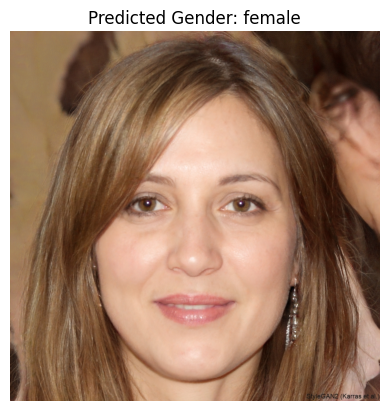

In [ ]:
import matplotlib.pyplot as plt

# Display the image and prediction
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title(f"Predicted Gender: {gender_label}")
plt.show()


## 2.2 Build the Vision Model for Age Classification (Image Classification Task)

In [ ]:
# Load age classification model
age_model_name = "nateraw/vit-age-classifier"
age_model = AutoModelForImageClassification.from_pretrained(age_model_name, token=hf_token)
age_processor = AutoProcessor.from_pretrained(age_model_name, token=hf_token)

config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
# Age Prediction
age_inputs = age_processor(images=image, return_tensors="pt")
age_outputs = age_model(**age_inputs)
age_logits = age_outputs.logits
age_prediction = age_logits.argmax(-1).item()
age_label = age_model.config.id2label[age_prediction]
age_label

'20-29'

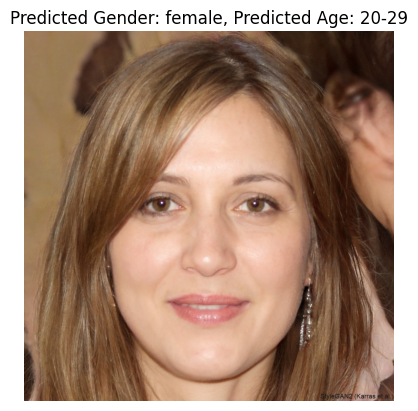

In [ ]:
# Display the image with both predictions
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Gender: {gender_label}, Predicted Age: {age_label}")
plt.show()

# Step 3: Start Building Multi-Agents

Define Each AI Agent
We'll define agents for:

* Administration Front Desk
* Physician for General Health Examination + Blood Laboratory
* X-Ray Image Department

## 3.1 Hospital Front Desk Agent



**--IMPORTANT NOTE--** <br>
1. Don't forget to save one photo from https://thispersondoesnotexist.com/
<br>  as female.jpg and save it to this Path "/content/sample_data/'
<br> which is standard path within your Google Colab

---
2. Don't Forget to Save one of the images from the x-ray-dataset <br>**Load Dataset in this way:** <br>
patient_x_ray_path = "keremberke/chest-xray-classification" <br>
x_ray_ds = load_dataset(patient_x_ray_path, name="full")
<br> Then save one image labelled as x-ray-chest.jpg to the path "/content/sample_data/'

In [ ]:
from typing import List, Tuple, Dict, Any, Sequence, Annotated, Literal
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
import operator
import functools
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode, create_react_agent
from langchain_core.tools import tool
from transformers import AutoModelForImageClassification, AutoProcessor
from PIL import Image
from pydantic import BaseModel

from langchain_core.output_parsers import StrOutputParser, JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate

# Annotated in python allows developers to declare the type of a reference and provide additional information related to it.
# Literal, after that the value are exact and literal

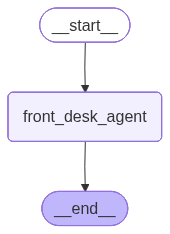

In [ ]:
#----------------- Build Fucntions that Agents use ----------------------

def patient_verification_tool(image_Path, selected_patient_data,  updated_patient_df) -> str:
    """Detects the gender from an image provided as a file path."""
    from PIL import Image
    print(image_Path)
    model = AutoModelForImageClassification.from_pretrained("rizvandwiki/gender-classification", token=hf_token)
    processor = AutoProcessor.from_pretrained("rizvandwiki/gender-classification", token=hf_token)
    image = Image.open(image_Path)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = outputs.logits.argmax(-1).item()
    print(f"Predicted Gender Of Patient is : {model.config.id2label[predicted_class]}")
    predicted_gender = model.config.id2label[predicted_class]

    from PIL import Image
    model = AutoModelForImageClassification.from_pretrained("nateraw/vit-age-classifier", token=hf_token)
    processor = AutoProcessor.from_pretrained("nateraw/vit-age-classifier", token=hf_token)
    image = Image.open(image_Path)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = outputs.logits.argmax(-1).item()
    print(f"predicted Age Class: {model.config.id2label[predicted_class]}")
    predicted_age_range = model.config.id2label[predicted_class]

    # Parse the age range string (e.g., "20-29")
    age_min, age_max = map(int, predicted_age_range.split('-'))
    print(f"age_mi: {age_min}, age_max: {age_max}")

    # Verify against the DataFrame
    matching_row = updated_patient_df[
        (updated_patient_df["First_Name"] == selected_patient["First_Name"]) &
        (updated_patient_df["Last_Name"] == selected_patient["Last_Name"]) &
        (updated_patient_df["Patient_ID"] == selected_patient["Patient_ID"]) &
        (updated_patient_df["Gender"].str.lower() == predicted_gender) &
        (updated_patient_df["Age"].between(age_min, age_max))
    ]
    print(f"matching_row {matching_row} ")
    if not matching_row.empty:
        patient_verification = f'''Verification successful.
                        Patient is : {selected_patient["First_Name"]} {selected_patient["Last_Name"]}
                        with ID {selected_patient["Patient_ID"]}
                        which is {predicted_gender} in age range of {predicted_age_range} can proceed to the physician.'''
    else:
      patient_verification = "ID not verified. Patient cannot proceed."
    return patient_verification

#------------------- Define Agents-----------------------------

class AgentState(TypedDict):
    initial_prompt : str
    messages: Annotated[List[BaseMessage], operator.add]
    patient_verification : str

def front_desk_agent(state, image_Path, selected_patient_data,  updated_patient_df):
    initial_prompt = state["initial_prompt"]
    # Call function
    patient_verification =  patient_verification_tool(image_Path, selected_patient_data,  updated_patient_df)
    print(patient_verification)
    return {"patient_verification": patient_verification}

#-----------------------------------------------------------------
#               Build the LangGraph for Hospital Front Desk     #
#-----------------------------------------------------------------

image_Path = "/content/sample_data/female.jpg"
selected_patient_data = selected_patient.to_dict()
updated_patient_df


front_desk_agent_node = functools.partial(front_desk_agent,
                                          image_Path = image_Path,
                                          selected_patient_data=selected_patient_data,
                                          updated_patient_df =updated_patient_df)

# 6. Set up the Langgraph state graph
FrontDeskGraph = StateGraph(AgentState)

# Define nodes for workflow
FrontDeskGraph.add_node("front_desk_agent", front_desk_agent_node)
FrontDeskGraph.add_edge(START, "front_desk_agent")
FrontDeskGraph.add_edge("front_desk_agent", END)


# Initialize memory to persist state between graph runs
FrontDeskWorkflow = FrontDeskGraph.compile()

from IPython.display import Markdown, display, Image
display(Image(FrontDeskWorkflow.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
initial_prompt = "You are Front Desk Administrator in an Hospital in the Netherlands. Start Verification of the following Patient:"


# Run the workflow
inputs = {"initial_prompt" : initial_prompt
          }
output = FrontDeskWorkflow.invoke(inputs)
output

/content/sample_data/female.jpg
Predicted Gender Of Patient is : female


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


predicted Age Class: 20-29
age_mi: 20, age_max: 29
matching_row      Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
4  Influenza   Yes   Yes     Yes                  Yes   25  Female   

  Blood Pressure Cholesterol Level Outcome Variable First_Name Last_Name  \
4         Normal            Normal         Positive      Merel   De Jong   

     Patient_ID  
4  M54H3K9L7P2E   
Verification successful.
                        Patient is : Merel De Jong
                        with ID M54H3K9L7P2E
                        which is female in age range of 20-29 can proceed to the physician.


{'initial_prompt': 'You are Front Desk Administrator in an Hospital in the Netherlands. Start Verification of the following Patient:',
 'messages': [],
 'patient_verification': 'Verification successful.\n                        Patient is : Merel De Jong\n                        with ID M54H3K9L7P2E\n                        which is female in age range of 20-29 can proceed to the physician.'}

In [ ]:
display(Markdown(output['patient_verification']))

## 3.2 Pysician Agent

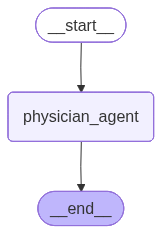

In [ ]:
def question_patient_symptoms(selected_patient_data) -> str:
    """Asks the patient about symptoms, generates responses, and summarizes the answers based on patient data."""
    symptoms_questions = {
        "Cough": "\nAre you coughing?\n",
        "Fatigue": "\nDo you feel fatigue?\n",
        "\nDifficulty Breathing": "Do you have difficulty breathing?\n"
    }

    conversation = []

    for symptom, question in symptoms_questions.items():
        conversation.append(f"\nPhysician: {question}")
        response = selected_patient_data.get(symptom, "No")
        answer = "Yes" if response == "Yes" else "No"
        conversation.append(f"\nPatient: {answer}")

    first_name = selected_patient_data.get("First_Name", "")
    last_name = selected_patient_data.get("Last_Name", "")
    patient_id = selected_patient_data.get("Patient_ID", "")
    gender = selected_patient_data.get("Gender", "")
    age = selected_patient_data.get("Age", "")

    profile = f"\nYou are {first_name} {last_name}, a {age} years old {gender} with Patient ID: {patient_id}."
    summary = profile +"I gathered that you are experiencing the following: "
    summaries = []
    for symptom in symptoms_questions.keys():
        response = selected_patient_data.get(symptom, "No")
        if response == "Yes":
            summaries.append(f"you are experiencing {symptom.lower()}")
        else:
            summaries.append(f"\nI am glad you are not experiencing {symptom.lower()}")
    summary += "; ".join(summaries) + "."

    conversation.append(f"\nPhysician: {summary}")

    return "\n".join(conversation)

def perform_examination(selected_patient_data) -> str:
    """Performs examination by reporting fever, blood pressure, and cholesterol level from patient data."""
    fever = selected_patient_data.get("Fever", "Unknown")
    blood_pressure = selected_patient_data.get("Blood Pressure", "Unknown")
    cholesterol = selected_patient_data.get("Cholesterol Level", "Unknown")
    return f"Examination Results: Fever - {fever}, Blood Pressure - {blood_pressure}, Cholesterol Level - {cholesterol}"

def diagnose_patient(selected_patient_data) -> str:
    """Provides diagnosis based on Disease and Outcome columns in patient data."""
    disease = selected_patient_data.get("Disease", "Unknown Disease")
    outcome = selected_patient_data.get("Outcome Variable", "Unknown Outcome")
    if outcome == 'Positive':
      diagnosis = 'Make X-Ray from Chest'
    else:
      diagnosis = 'Rest to Recover'
    return f"Diagnosis: {disease}. Test Result: {outcome}. Final Diagnosis: {diagnosis}", diagnosis


class AgentState(TypedDict):
    initial_prompt : str
    messages: Annotated[List[BaseMessage], operator.add]
    question_patient_symptoms: str
    examination_patient: str
    diagnosis_patient: str
    diagnosis : str


def physician_agent(state, selected_patient_data):
    question_patient= question_patient_symptoms(selected_patient_data)
    examination = perform_examination(selected_patient_data)
    diagnosis_report, diagnosis  = diagnose_patient(selected_patient_data)
    return {"question_patient_symptoms": question_patient,
            "examination_patient": examination,
            "diagnosis_patient": diagnosis_report,
            "diagnosis": diagnosis}


selected_patient_data = selected_patient.to_dict()

physician_agent_node = functools.partial(physician_agent,
                                          selected_patient_data=selected_patient_data)


# 6. Set up the Langgraph state graph
PhysicianGraph = StateGraph(AgentState)

# Define nodes for workflow
PhysicianGraph.add_node("physician_agent", physician_agent_node)
PhysicianGraph.add_edge(START, "physician_agent")
PhysicianGraph.add_edge("physician_agent", END)


# Initialize memory to persist state between graph runs
PhysicianWorkflow = PhysicianGraph.compile()

display(Image(PhysicianWorkflow.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
initial_prompt = "You are a Very Experience Doctor in an Hospital in the Netherlands. Start a conversation with the patient and determine \
                   symptoms and give diagnosis"


# Run the workflow
inputs = {"initial_prompt" : initial_prompt
          }
output = PhysicianWorkflow.invoke(inputs)
output

{'initial_prompt': 'You are a Very Experience Doctor in an Hospital in the Netherlands. Start a conversation with the patient and determine                    symptoms and give diagnosis',
 'messages': [],
 'question_patient_symptoms': '\nPhysician: \nAre you coughing?\n\n\nPatient: Yes\n\nPhysician: \nDo you feel fatigue?\n\n\nPatient: Yes\n\nPhysician: Do you have difficulty breathing?\n\n\nPatient: No\n\nPhysician: \nYou are Merel De Jong, a 25 years old Female with Patient ID: M54H3K9L7P2E.I gathered that you are experiencing the following: you are experiencing cough; you are experiencing fatigue; \nI am glad you are not experiencing \ndifficulty breathing.',
 'examination_patient': 'Examination Results: Fever - Yes, Blood Pressure - Normal, Cholesterol Level - Normal',
 'diagnosis_patient': 'Diagnosis: Influenza. Test Result: Positive. Final Diagnosis: Make X-Ray from Chest',
 'diagnosis': 'Make X-Ray from Chest'}

In [ ]:
display(Markdown(output['question_patient_symptoms']))
display(Markdown(output['examination_patient']))
display(Markdown(output['diagnosis_patient']))


Physician: 
Are you coughing?


Patient: Yes

Physician: 
Do you feel fatigue?


Patient: Yes

Physician: Do you have difficulty breathing?


Patient: No

Physician: 
You are Merel De Jong, a 25 years old Female with Patient ID: M54H3K9L7P2E.I gathered that you are experiencing the following: you are experiencing cough; you are experiencing fatigue; 
I am glad you are not experiencing 
difficulty breathing.

Examination Results: Fever - Yes, Blood Pressure - Normal, Cholesterol Level - Normal

Diagnosis: Influenza. Test Result: Positive. Final Diagnosis: Make X-Ray from Chest

## 3.3 Radiologist

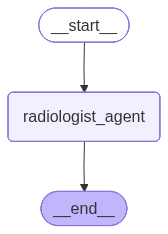

In [ ]:
def examine_X_ray_image(patient_x_ray_path) -> str:
    """Use Vision Models to recognise if the X-Ray Image of Patient is NORMAL or PNEUMONIA"""
    # Model in Hugging Face: https://huggingface.co/lxyuan/vit-xray-pneumonia-classification
    # vit-xray-pneumonia-classification
    #x_ray_ds = load_dataset(patient_x_ray_path, name="full")
    #random_index = random.randint(0, x_ray_ds['train'].shape[0] - 1)
    #patient_x_ray_image  = x_ray_ds['train'][random_index]['image']
    #classifier = pipeline(model="lxyuan/vit-xray-pneumonia-classification")
    #patient_x_ray_results = classifier(patient_x_ray_image)

    # Minimalistic Kaggle Chest X-ray Loading
    import kagglehub
    import random
    from PIL import Image
    import os
    import glob

    # Download Kaggle dataset
    path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

    # Find all chest X-ray images
    image_files = glob.glob(os.path.join(path, "**/*.jpeg"), recursive=True)
    image_files.extend(glob.glob(os.path.join(path, "**/*.jpg"), recursive=True))

    # Select random chest X-ray image
    random_index = random.randint(0, len(image_files) - 1)
    patient_x_ray_image = Image.open(image_files[random_index]).convert('L')
    hf_token = os.getenv("HF_TOKEN2")
    print("Loading X-ray classification model...")
    classifier = pipeline(
        model="lxyuan/vit-xray-pneumonia-classification",
        token=hf_token  # Use your working token
    )
    patient_x_ray_results = classifier(patient_x_ray_image)
    # Find the label with the highest score and its score
    highest = max(patient_x_ray_results, key=lambda x: x['score'])
    highest_score_label = highest['label']
    highest_score = highest['score'] * 100  # Convert to percentage

    # Choose the correct verb based on the label
    verb = "is" if highest_score_label == "NORMAL" else "has"

    return f"Patient {verb} {highest_score_label} with Probability of ca. {highest_score:.0f}%"

class AgentState(TypedDict):
    initial_prompt : str
    messages: Annotated[List[BaseMessage], operator.add]
    pneumonia_detection: str



def radiologist_agent(state, patient_x_ray_path):
    pneumonia_detection = examine_X_ray_image(patient_x_ray_path)
    return {"pneumonia_detection": pneumonia_detection}

patient_x_ray_path = "keremberke/chest-xray-classification"

radiologist_agent_node = functools.partial(radiologist_agent,
                                          patient_x_ray_path=patient_x_ray_path)

# 6. Set up the Langgraph state graph
RadiologistGraph = StateGraph(AgentState)

# Define nodes for workflow
RadiologistGraph.add_node("radiologist_agent", radiologist_agent_node)
RadiologistGraph.add_edge(START, "radiologist_agent")
RadiologistGraph.add_edge("radiologist_agent", END)

# Initialize memory to persist state between graph runs
RadiologistWorkflow = RadiologistGraph.compile()

display(Image(RadiologistWorkflow.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
initial_prompt = "You are a Very Experienced Radiologist in an Hospital in the Netherlands. Diagnose if the patient has pneumonia"


# Run the workflow
inputs = {"initial_prompt" : initial_prompt
          }
output = RadiologistWorkflow.invoke(inputs)
output

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Loading X-ray classification model...


Device set to use cpu


{'initial_prompt': 'You are a Very Experienced Radiologist in an Hospital in the Netherlands. Diagnose if the patient has pneumonia',
 'messages': [],
 'pneumonia_detection': 'Patient has PNEUMONIA with Probability of ca. 81%'}

In [ ]:
display(Markdown(output['pneumonia_detection']))

Patient has PNEUMONIA with Probability of ca. 81%

# Step 4: Putting All Agents in One Graph

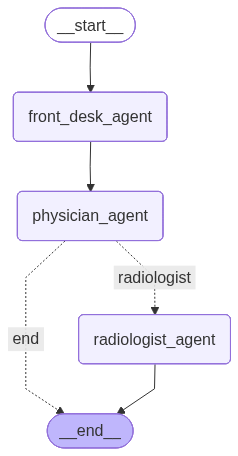

In [ ]:
from langchain_core.output_parsers import StrOutputParser, JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate

selected_patient_data = selected_patient.to_dict()
image_Path = "/content/sample_data/female.jpg"
patient_x_ray_image = patient_x_ray

def patient_verification_tool(image_Path, selected_patient_data,  updated_patient_df) -> str:
    """Detects the gender from an image provided as a file path."""
    from PIL import Image
    print(image_Path)
    model = AutoModelForImageClassification.from_pretrained("rizvandwiki/gender-classification", token=hf_token)
    processor = AutoProcessor.from_pretrained("rizvandwiki/gender-classification", token=hf_token)
    image = Image.open(image_Path)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = outputs.logits.argmax(-1).item()
    print(f"Predicted Gender Of Patient is : {model.config.id2label[predicted_class]}")
    predicted_gender = model.config.id2label[predicted_class]

    from PIL import Image
    model = AutoModelForImageClassification.from_pretrained("nateraw/vit-age-classifier", token=hf_token)
    processor = AutoProcessor.from_pretrained("nateraw/vit-age-classifier", token=hf_token)
    image = Image.open(image_Path)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = outputs.logits.argmax(-1).item()
    print(f"predicted Age Class: {model.config.id2label[predicted_class]}")
    predicted_age_range = model.config.id2label[predicted_class]

    # Parse the age range string (e.g., "20-29")
    age_min, age_max = map(int, predicted_age_range.split('-'))
    print(f"age_mi: {age_min}, age_max: {age_max}")

    # Verify against the DataFrame
    matching_row = updated_patient_df[
        (updated_patient_df["First_Name"] == selected_patient["First_Name"]) &
        (updated_patient_df["Last_Name"] == selected_patient["Last_Name"]) &
        (updated_patient_df["Patient_ID"] == selected_patient["Patient_ID"]) &
        (updated_patient_df["Gender"].str.lower() == predicted_gender) &
        (updated_patient_df["Age"].between(age_min, age_max))
    ]
    print(f"matching_row {matching_row} ")
    if not matching_row.empty:
        patient_verification = f'''Verification successful.
                        Patient is : {selected_patient["First_Name"]} {selected_patient["Last_Name"]}
                        with ID {selected_patient["Patient_ID"]}
                        which is {predicted_gender} in age range of {predicted_age_range} can proceed to the physician.'''
    else:
      patient_verification = "ID not verified. Patient cannot proceed."
    return patient_verification

def question_patient_symptoms(selected_patient_data) -> str:
    """Asks the patient about symptoms, generates responses, and summarizes the answers based on patient data."""
    symptoms_questions = {
        "Cough": "\nAre you coughing?\n",
        "Fatigue": "\nDo you feel fatigue?\n",
        "\nDifficulty Breathing": "Do you have difficulty breathing?\n"
    }

    conversation = []

    for symptom, question in symptoms_questions.items():
        conversation.append(f"\nPhysician: {question}")
        response = selected_patient_data.get(symptom, "No")
        answer = "Yes" if response == "Yes" else "No"
        conversation.append(f"\nPatient: {answer}")

    first_name = selected_patient_data.get("First_Name", "")
    last_name = selected_patient_data.get("Last_Name", "")
    patient_id = selected_patient_data.get("Patient_ID", "")
    gender = selected_patient_data.get("Gender", "")
    age = selected_patient_data.get("Age", "")

    profile = f"\nYou are {first_name} {last_name}, a {age} years old {gender} with Patient ID: {patient_id}."
    summary = profile +"I gathered that you are experiencing the following: "
    summaries = []
    for symptom in symptoms_questions.keys():
        response = selected_patient_data.get(symptom, "No")
        if response == "Yes":
            summaries.append(f"you are experiencing {symptom.lower()}")
        else:
            summaries.append(f"\nI am glad you are not experiencing {symptom.lower()}")
    summary += "; ".join(summaries) + "."

    conversation.append(f"\nPhysician: {summary}")

    return "\n".join(conversation)

def perform_examination(selected_patient_data) -> str:
    """Performs examination by reporting fever, blood pressure, and cholesterol level from patient data."""
    fever = selected_patient_data.get("Fever", "Unknown")
    blood_pressure = selected_patient_data.get("Blood Pressure", "Unknown")
    cholesterol = selected_patient_data.get("Cholesterol Level", "Unknown")
    return f"Examination Results: Fever - {fever}, Blood Pressure - {blood_pressure}, Cholesterol Level - {cholesterol}"

def diagnose_patient(selected_patient_data) -> str:
    """Provides diagnosis based on Disease and Outcome columns in patient data."""
    disease = selected_patient_data.get("Disease", "Unknown Disease")
    outcome = selected_patient_data.get("Outcome Variable", "Unknown Outcome")
    if outcome == 'Positive':
      diagnosis = 'Make X-Ray from Chest'
    else:
      diagnosis = 'Rest to Recover'
    return f"Diagnosis: {disease}. Test Result: {outcome}. Final Diagnosis: {diagnosis}", diagnosis

def examine_X_ray_image(patient_x_ray_path) -> str:
    import kagglehub
    import random
    from PIL import Image
    import os
    import glob
    """Use Vision Models to recognise if the X-Ray Image of Patient is NORMAL or PNEUMONIA"""
    # Model in Hugging Face: https://huggingface.co/lxyuan/vit-xray-pneumonia-classification
    # vit-xray-pneumonia-classification
    # Download Kaggle dataset
    path = kagglehub.dataset_download(patient_x_ray_path)

    # Find all chest X-ray images
    image_files = glob.glob(os.path.join(path, "**/*.jpeg"), recursive=True)
    image_files.extend(glob.glob(os.path.join(path, "**/*.jpg"), recursive=True))

    # Select random chest X-ray image
    random_index = random.randint(0, len(image_files) - 1)
    patient_x_ray_image = Image.open(image_files[random_index]).convert('L')
    #x_ray_ds = load_dataset(patient_x_ray_path, name="full")
    #random_index = random.randint(0, x_ray_ds['train'].shape[0] - 1)
    #patient_x_ray_image  = x_ray_ds['train'][random_index]['image']
    classifier = pipeline(model="lxyuan/vit-xray-pneumonia-classification", token=hf_token)
    patient_x_ray_results = classifier(patient_x_ray_image)

    # Find the label with the highest score and its score
    highest = max(patient_x_ray_results, key=lambda x: x['score'])
    highest_score_label = highest['label']
    highest_score = highest['score'] * 100  # Convert to percentage

    # Choose the correct verb based on the label
    verb = "is" if highest_score_label == "NORMAL" else "has"

    return f"Patient {verb} {highest_score_label} with Probability of ca. {highest_score:.0f}%"

# The agent state is the input to each node in the graph
class AgentState(TypedDict):
    # The annotation tells the graph that new messages will always
    # be added to the current states
    initial_prompt : str
    messages: Annotated[List[BaseMessage], operator.add]
    patient_verification : str
    question_patient_symptoms: str
    examination_patient: str
    diagnosis_patient: str
    diagnosis : str
    pneumonia_detection: str

def front_desk_agent(state, image_Path, selected_patient_data,  updated_patient_df):
    initial_prompt = state["initial_prompt"]
    patient_verification =  patient_verification_tool(image_Path, selected_patient_data,  updated_patient_df)
    print(patient_verification)
    return {"patient_verification": patient_verification}

def physician_agent(state, selected_patient_data):
    question_patient= question_patient_symptoms(selected_patient_data)
    examination = perform_examination(selected_patient_data)
    diagnosis_report, diagnosis  = diagnose_patient(selected_patient_data)
    pneumonia_detection = examine_X_ray_image(patient_x_ray_path)
    return {"question_patient_symptoms": question_patient,
            "examination_patient": examination,
            "diagnosis_patient": diagnosis_report,
            "diagnosis": diagnosis}

def radiologist_agent(state, patient_x_ray_path):
    pneumonia_detection = examine_X_ray_image(patient_x_ray_path)
    return {"pneumonia_detection": pneumonia_detection}

def decide_on_radiologist(state):
  if state["diagnosis"] == 'Make X-Ray from Chest':
    return 'radiologist'
  else:
    return ''


image_Path = "/content/sample_data/female.jpg"
selected_patient_data = selected_patient.to_dict()
updated_patient_df
patient_x_ray_path = "paultimothymooney/chest-xray-pneumonia"

front_desk_agent_node = functools.partial(front_desk_agent,
                                          image_Path = image_Path,
                                          selected_patient_data=selected_patient_data,
                                          updated_patient_df =updated_patient_df)
physician_agent_node = functools.partial(physician_agent,
                                          selected_patient_data=selected_patient_data)

radiologist_agent_node = functools.partial(radiologist_agent,
                                          patient_x_ray_path=patient_x_ray_path)

def decide_on_radiologist(state):
  if state["diagnosis"] == 'Make X-Ray from Chest':
    return 'radiologist'
  else:
    return 'end'

# 6. Set up the Langgraph state graph
HospitalGraph = StateGraph(AgentState)

# Define nodes for workflow
HospitalGraph.add_node("front_desk_agent", front_desk_agent_node)
HospitalGraph.add_node("physician_agent", physician_agent_node)
HospitalGraph.add_node("radiologist_agent", radiologist_agent_node)

HospitalGraph.add_edge(START, "front_desk_agent")
HospitalGraph.add_edge("front_desk_agent", "physician_agent")
HospitalGraph.add_conditional_edges("physician_agent",
                                    decide_on_radiologist,
                                    {'radiologist': "radiologist_agent",
                                     'end': END})


# Initialize memory to persist state between graph runs
HospitalWorkflow = HospitalGraph.compile()

display(Image(HospitalWorkflow.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
initial_prompt = "Start with the following Patient"


# Run the workflow
inputs = {"initial_prompt" : initial_prompt
          }
output = HospitalWorkflow.invoke(inputs)
output

/content/sample_data/female.jpg
Predicted Gender Of Patient is : female


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


predicted Age Class: 20-29
age_mi: 20, age_max: 29
matching_row      Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
4  Influenza   Yes   Yes     Yes                  Yes   25  Female   

  Blood Pressure Cholesterol Level Outcome Variable First_Name Last_Name  \
4         Normal            Normal         Positive      Merel   De Jong   

     Patient_ID  
4  M54H3K9L7P2E   
Verification successful.
                        Patient is : Merel De Jong
                        with ID M54H3K9L7P2E
                        which is female in age range of 20-29 can proceed to the physician.
Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


Device set to use cpu


100%|██████████| 2.29G/2.29G [00:45<00:00, 54.2MB/s]

Extracting files...



Device set to use cpu


{'initial_prompt': 'Start with the following Patient',
 'messages': [],
 'patient_verification': 'Verification successful.\n                        Patient is : Merel De Jong\n                        with ID M54H3K9L7P2E\n                        which is female in age range of 20-29 can proceed to the physician.',
 'question_patient_symptoms': '\nPhysician: \nAre you coughing?\n\n\nPatient: Yes\n\nPhysician: \nDo you feel fatigue?\n\n\nPatient: Yes\n\nPhysician: Do you have difficulty breathing?\n\n\nPatient: No\n\nPhysician: \nYou are Merel De Jong, a 25 years old Female with Patient ID: M54H3K9L7P2E.I gathered that you are experiencing the following: you are experiencing cough; you are experiencing fatigue; \nI am glad you are not experiencing \ndifficulty breathing.',
 'examination_patient': 'Examination Results: Fever - Yes, Blood Pressure - Normal, Cholesterol Level - Normal',
 'diagnosis_patient': 'Diagnosis: Influenza. Test Result: Positive. Final Diagnosis: Make X-Ray from Ches

In [ ]:
display(Markdown(output['patient_verification']))


Verification successful.
                        Patient is : Merel De Jong
                        with ID M54H3K9L7P2E
                        which is female in age range of 20-29 can proceed to the physician.

In [ ]:
display(Markdown(output['question_patient_symptoms']))
display(Markdown(output['examination_patient']))
display(Markdown(output['diagnosis_patient']))


Physician: 
Are you coughing?


Patient: Yes

Physician: 
Do you feel fatigue?


Patient: Yes

Physician: Do you have difficulty breathing?


Patient: No

Physician: 
You are Merel De Jong, a 25 years old Female with Patient ID: M54H3K9L7P2E.I gathered that you are experiencing the following: you are experiencing cough; you are experiencing fatigue; 
I am glad you are not experiencing 
difficulty breathing.

Examination Results: Fever - Yes, Blood Pressure - Normal, Cholesterol Level - Normal

Diagnosis: Influenza. Test Result: Positive. Final Diagnosis: Make X-Ray from Chest

In [ ]:
display(Markdown(output['pneumonia_detection']))

Patient has PNEUMONIA with Probability of ca. 99%

# Step 5: Gradio Dashboard

## 5.1 Build the Hospital Dashboard APP

In [ ]:
x_ray_image_path = '/content/sample_data/x-ray-chest.png'

import gradio as gr
info = (
        f"**First Name:** {selected_patient_data['First_Name']}\n\n"
        f"**Last Name:** {selected_patient_data['Last_Name']}\n\n"
        f"**Patient ID:** {selected_patient_data['Patient_ID']}"
    )

def verify_age_gender():
    """
    Function to verify age and gender.
    """
    # Placeholder logic: In a real scenario, perform necessary checks or computations
    initial_prompt = "You are Front Desk Administrator in an Hospital in the Netherlands. Start Verification of the following Patient:"
    inputs = {"initial_prompt" : initial_prompt
          }
    output = FrontDeskWorkflow.invoke(inputs)
    verification_message = '✅ ' + output['patient_verification']
    return verification_message, gr.update(visible=True)

def physician_examination():
    initial_prompt = "You are a Very Experience Doctor in an Hospital in the Netherlands. Start a conversation with the patient and determine \
                   symptoms and give diagnosis"
    # Run the workflow
    inputs = {"initial_prompt" : initial_prompt
          }
    output = PhysicianWorkflow.invoke(inputs)
    output_all = f''' 🩺 {output['question_patient_symptoms']}\n
                     💓 {output['examination_patient']}\n
                     🌬️ {output['diagnosis_patient']}'''
    return output_all, gr.update(visible=True)

def pneumonia_detection():
    initial_prompt = "You are a Very Experienced Radiologist in an Hospital in the Netherlands. Diagnose if the patient has pneumonia"
    inputs = {"initial_prompt" : initial_prompt
          }
    output = RadiologistWorkflow.invoke(inputs)
    pneumonia_detection = 'From X-Ray Image 🖼️ ' + output['pneumonia_detection']
    return pneumonia_detection

def take_xray_image():

    return gr.update(visible=True), gr.update(visible=True)

with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown(info)
            # Add a Button below the Markdown
            verify_button = gr.Button("Verify Age and Gender")
            # Add an output component to display verification status
            verification_output = gr.Textbox(label="Verification Status", interactive=False)
            # Add a Button below the Markdown
            physician_button = gr.Button("Get Examination at Physician", visible=False)
            physician_output = gr.Textbox(label="Examination by Physician Placeholder", interactive=False)
            x_ray_button = gr.Button("Take Chest X-Ray Image", visible=False)
            # Display X-Ray Image (Initially Hidden)
            xray_image_display = gr.Image(value=x_ray_image_path, label="X-Ray Image", visible=False)
            radiologist_button = gr.Button("Go to Radiologist", visible=False)
            # Add an output component to display verification status
            radiologist_output = gr.Textbox(label="Radiologist Placeholder", interactive=False)

        with gr.Column(scale=1):
            gr.Image(value=image_Path, label="Static Image", show_label=True)

    # Define the button's action: When clicked, call verify_age_gender and display the result
    verify_button.click(fn=verify_age_gender, inputs=None, outputs=[verification_output, physician_button])
    physician_button.click(fn=physician_examination, inputs=None, outputs=[physician_output, x_ray_button])
    x_ray_button.click(fn=take_xray_image, inputs=None, outputs=[xray_image_display, radiologist_button])
    radiologist_button.click(fn=pneumonia_detection, inputs=None, outputs=[radiologist_output])


## 5.2 Run the App

In [ ]:
# Launch the app
demo.launch()

# Step 6: Building Advanced Retrieval (RAG)

## 6.1 Textsplitter

In [ ]:
# Patient records (3 example patients)

text_content = ["Patient 1: Mette Smit, a 25 years old Female with Patient ID: X8g6eC2R7uPvN5a1."
                "Mette is coughing and is experiencing fatigue. Mette has fever and Influenza."
                "Mette has Pneuomnia with Probability of ca. 92%."
                "Patient 2: Tim Sutherland has fever and suffer from difficuly in breathing.",
                "We made an X-Ray Image from Tim Sutherland chest.",
                "Radiologist give Tim Sutherland 93% chance of Pneuomnia",
                "Patient 3: Jane Bright has no fever and suffer from high blood pressure and high chlostole.",
                "We made an X-Ray Image from Jane Bright chest because of non-stop caughing",
                "Radiologist give only 8% chance of Pneuomnia for Jane. It seems that Jane Bright has an influenza",]

documents = [Document(page_content=text) for text in text_content]

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
splits = text_splitter.split_documents(documents)
splits

In [ ]:
text_chunks = []
for page in splits:
    chunks = text_splitter.split_text(page.page_content)
    text_chunks.extend(chunks)
text_chunks

## 6.2 Embedding

In [ ]:
hf_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
embeddings = hf_embeddings.embed_documents(text_chunks)

## 6.3 Vector Database

In [ ]:
persist_directory = '/content/sample_data/chrmoadb'

vectordb = Chroma.from_documents(documents=splits,
                                 embedding=hf_embeddings,
                                 persist_directory=persist_directory)

## 6.4 LLM | Groq + Llama 3.3

In [ ]:
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

# Model 3.2 is removed from Groq platform
# So we use the Newest one: 3.3

model_3_3 ='llama-3.3-70b-versatile'

llm = ChatGroq(
    model=model_3_3,
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## 6.5 Query Prompt

In [ ]:
QUERY_PROMPT = PromptTemplate(
    input_variables=["question"],
    template="""You are an AI language model assistant. Your task is to generate five
    different versions of the given user question to retrieve relevant documents from
    a vector database. By generating multiple perspectives on the user question, your
    goal is to help the user overcome some of the limitations of the distance-based
    similarity search. Provide these alternative questions separated by newlines.
    Original question: {question}""",
)

## 6.6 Retriever

In [ ]:
overall_retriever = MultiQueryRetriever.from_llm(
                                          vectordb.as_retriever(),
                                          llm,
                                          prompt=QUERY_PROMPT
)

# RAG prompt
template = """Answer the question based ONLY on the following context:
{context}
Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

## 6.7 Chain

In [ ]:
chain = (
    {"context": overall_retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Step 7: Chatting with RAG

In [ ]:
questions = '''What are the names of all the patients in the database?'''
display(Markdown(chain.invoke(questions)))

In [ ]:
questions = '''What are all the health issues that Jane Bright has?'''
display(Markdown(chain.invoke(questions)))

In [ ]:
questions = '''What are all the health issues that Mette Smit has?'''
display(Markdown(chain.invoke(questions)))

In [ ]:
questions = '''What is the age of Tim Sutherland?'''
display(Markdown(chain.invoke(questions)))

In [ ]:
questions = '''Which patient has a Patient ID?'''
display(Markdown(chain.invoke(questions)))